In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Dropout,
)
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from deepface import DeepFace

from deepface.modules import modeling, detection, preprocessing

In [46]:
# load pickle file
files = ['Train_color.pkl', 'Test_color.pkl', 'Validation_color.pkl']
x_train_list = []
y_train_list = [] 
for file in files:
    with open(file, 'rb') as f:
        features, labels = pickle.load(f)
    
    for pic, label in zip(features, labels):
        # plt.imshow(img_gray, cmap='binary_r')
        x_train_list.append(pic)
        y_train_list.append(label)

In [47]:
x_train_list[0].shape

(480, 640, 3)

In [98]:
img_objs = detection.extract_faces(
        img_path=x_train_list[1000],
        detector_backend='mtcnn',
        grayscale=False,
        enforce_detection=False,
    )

TypeError: extract_faces() got an unexpected keyword argument 'silent'

In [94]:
img_objs[0]['face'].shape

(198, 153, 3)

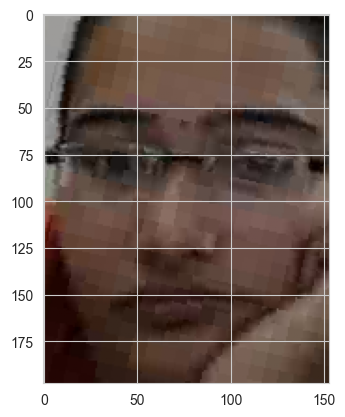

In [95]:
plt.imshow(img_objs[0]['face'])

In [96]:
cv2.imwrite('placeholder.jpg', 255*img_objs[0]['face'])
cropped_img = cv2.imread('placeholder.jpg')
img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (64, 64))

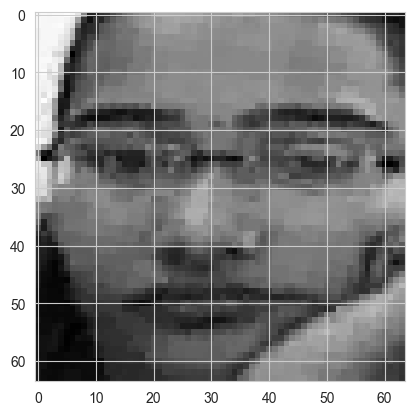

In [97]:
plt.imshow(img_gray, cmap='binary_r')

In [72]:
cropped_img

array([[[163, 162, 164],
        [163, 162, 164],
        [163, 162, 164],
        ...,
        [137, 139, 147],
        [126, 129, 137],
        [114, 119, 128]],

       [[163, 162, 164],
        [163, 162, 164],
        [163, 162, 164],
        ...,
        [136, 138, 146],
        [125, 128, 136],
        [113, 118, 127]],

       [[163, 163, 163],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [138, 140, 148],
        [127, 130, 138],
        [116, 119, 127]],

       ...,

       [[ 79,  16,  12],
        [ 79,  16,  12],
        [ 76,  15,  11],
        ...,
        [ 35,  11,   5],
        [ 34,  10,   4],
        [ 37,   8,   4]],

       [[ 79,  16,  12],
        [ 79,  16,  12],
        [ 77,  16,  12],
        ...,
        [ 34,  10,   4],
        [ 33,   9,   3],
        [ 35,   8,   4]],

       [[ 77,  16,  12],
        [ 77,  16,  12],
        [ 77,  16,  12],
        ...,
        [ 32,  10,   4],
        [ 34,  10,   4],
        [ 35,   8,   4]]